
# Getting started

Once you've chosen your scenario, download the data from the Iowa website in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.metrics as metrics
import sklearn.linear_model as linear_model
import statsmodels.api as sm

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

iowa = pd.read_csv('~/Downloads/iowa_liquor_sales_proj_2.csv')

random_state=42

/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/joshsungasong/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

# Record your findings

Be sure to write out anything observations from your exploratory analysis.


First checked for null values: County number, county, category, category name.

Second checked for shape: 270955 rows and 18 columns

Interesting data types of columns to look at: zip code is labeled as an object, state bottle cost is listed as an object, state bottle retail listed as an object, sale (dollars) listed as an object. State Bottle Retail has a dollar sign in front of the numbers, so that is why they are listed as objects. This is the same for State Bottle Cost. 270,955 null values appear for zip codes. Sale (Dollars) is listed as an object as well.

I removed the dollar signs for both State Bottle Retail and State Bottle Cost and them into floats.

I also changed all volumes to liters, therefore I dropped the Volume (in gallons) column. I also renamed the Category into Category Number to distinguish from Category Name. I dropped County Number, Category, Category Name, Vendor Number, Item Number, Item Description to make the data frame a bit smaller so I can be able to work with more easily. What remains are the numerical data series along with County name and store number. I also dropped a couple of rows that contained outliers for the numerical columns.

Problem statement gives you direction, score. there can be similar problem statements. main takeaways, what focus, etc.

figuring out your project. often make a problem statement so you don't go down a rabbit hole. 

Exploratory data analysis: you are exploring the data (inward facing), seeing what the data looks like, understanding it

explanatory data analysis: explaining the data to the client

they often aren't overlapping

understand 2015 liquor data to predict 2016 sales data

target: 2016 sales data

input: 2015 liquor data


# My objective is to see which model(s) will be able to better predict total sales. 

#  My problem statement:  Which aspects of the Iowa liquor data will be able to perform well in a model to project total sales for 2016?

###### Getting a feel of the data 

In [2]:
iowa.shape 

(2709552, 24)

In [2]:
def eda(dataframe): #Ritika DSI alum
    print("missing values \n", iowa.isnull().sum())
    print("dataframe index \n", iowa.index)
    print("dataframe types \n", iowa.dtypes)
    print("dataframe shape \n", iowa.shape)
    print("dataframe describe \n", iowa.describe())
    for item in iowa:
        print (item)
        print (iowa[item].nunique())

In [153]:
eda(iowa)

missing values 
 Invoice/Item Number        0
Date                       0
Store Number               0
Store Name                 0
Address                    0
Store Location             0
County                 10913
Vendor Name                0
Pack                       0
State Bottle Cost          0
State Bottle Retail        0
Bottles Sold               0
Sale (Dollars)             0
Volume Sold                0
Year                       0
Sales                      0
Bottle Volume              0
Profit                     0
dtype: int64
dataframe index 
 RangeIndex(start=0, stop=2709552, step=1)
dataframe types 
 Invoice/Item Number            object
Date                   datetime64[ns]
Store Number                    int64
Store Name                     object
Address                        object
Store Location                 object
County                         object
Vendor Name                    object
Pack                            int64
State Bottle Cost           

### Description of the variables (including the renaming of columns and unit conversions)

|Column name| Data Type | Description |
|:---|:---|
|Date|String|Date of the liquor order|
|Store Number|Integer|An store number in the form of an integer|
|City|Object|City where the store is located|
|Zip Code|Object|Zip code where the store is located|
|County Number|Float|Iowa county number for the county where the store is located|
|County|Object|The county where the store is located|
|Category Number (renamed from Category)|Float|Category code associated with the liqour order|
|Category Name|Object|Category of the liquor order|
|Vendor Number|Integer|The vendor number of the company for the brand of liquor offered|
|Item Number|Integer|Item Number for the individual liquor product ordered|
|Item description|Object|Description of the individual liquor ordered|
|Bottle Volume|Float|Volume of each liquor bottle in liters|
|State Bottle Cost|Float|The amount paid for each bottle of liquor ordered|
|State Bottle Retail|Float|The amount the store paid for each bottle of product ordered
|Bottles Sold|Float|The number of bottles of liquor sold per order|
|Sale|Float|Total cost of liquor order measured in U.S. dollars|
|Volume Sold|Float|Total volume of liquor ordered in liters|

I used the assert function to make sure no values are less than 0 such as State Bottle Cost, State Bottle Retail, Bottles Sold, Volume Sold, Sales, Bottle Volume, etc. Since you don't want to have negative prices or negative volumes or sales.

### Cleaning the data

In [5]:
iowa["Date"] = pd.to_datetime(iowa["Date"]) #changing the dates to a date/time series

In [6]:
import datetime as dt
from datetime import datetime

In [7]:
iowa['Year'] = iowa['Date'].dt.year

In [8]:
iowa['Sale (Dollars)'] = iowa['Sale (Dollars)'].str.replace('$', '') #removing dollar sign

In [9]:
iowa['State Bottle Retail'] = iowa['State Bottle Retail'].str.replace('$', '') #removing dollar sign

In [10]:
iowa['State Bottle Cost'] = iowa['State Bottle Cost'].str.replace('$', '') #removing dollar sign

In [11]:
iowa['State Bottle Retail'] = iowa['State Bottle Retail'].astype('float64') 

In [12]:
iowa['State Bottle Cost'] = iowa['State Bottle Cost'].astype('float64') 

In [13]:
iowa['Sales'] = iowa['Sale (Dollars)'].str.strip() #removing white space realized this column has white spaces and
#also labeling it as Sales to remove the Dollars label

In [14]:
iowa['Sales'] = iowa['Sales'].str.replace(',', '')

In [15]:
iowa['Sales'] = iowa['Sales'].astype('float64')

In [16]:
iowa['State Bottle Retail'] = iowa['State Bottle Retail'].astype('float64') #converting to float

In [17]:
iowa['Bottle Volume (ml)'] = iowa['Bottle Volume (ml)'].astype('float64') #converting to float

In [18]:
iowa['Bottles Sold'] = iowa['Bottles Sold'].astype('float64')

In [19]:
iowa = iowa.drop(['Volume Sold (Gallons)'], axis=1)

In [20]:
iowa['Bottle Volume'] = iowa['Bottle Volume (ml)']/1000.00

In [21]:
iowa = iowa.drop(['Bottle Volume (ml)'], axis=1)

In [22]:
iowa = iowa.rename(columns={"Volume Sold (Liters)": "Volume Sold", "Category": "Category Number"}) #renaming Volume Sold (Liters)
#to remove the (Liters) as all volume units are in liters (volume sold)

In [23]:
iowa = iowa.drop(['City', 'Zip Code', 'County Number', 'Category Number', 
                  'Category Name', 'Vendor Number', 'Item Number', 'Item Description'], axis=1)

In [24]:
iowa['Profit'] = iowa['State Bottle Retail'] - iowa['State Bottle Cost'] #engineering a new column to calculate the margin
#between state bottle retail and state bottle cost. 

In [25]:
iowa.head() #to ensure the column was added 

,Invoice/Item Number,Date,Store Number,Store Name,Address,Store Location,County,Vendor Name,Pack,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold,Year,Sales,Bottle Volume,Profit
0,S29198800001,2015-11-20,2191,Keokuk Spirits,1013 MAIN,"1013 MAIN\nKEOKUK 52632\n(40.39978, -91.387531)",Lee,Wilson Daniels Ltd.,6,18.09,27.14,6.0,162.84,4.50,2015,162.84,0.75,9.05
1,S29195400002,2015-11-21,2205,Ding's Honk And Holler,900 E WASHINGTON,"900 E WASHINGTON\nCLARINDA 51632\n(40.739238, ...",Page,Wilson Daniels Ltd.,6,18.09,27.14,12.0,325.68,9.00,2015,325.68,0.75,9.05
2,S29050300001,2015-11-16,3549,Quicker Liquor Store,1414 48TH ST,"1414 48TH ST\nFORT MADISON 52627\n(40.624226, ...",Lee,Disaronno International LLC,20,6.40,9.60,2.0,19.20,0.30,2015,19.20,0.15,3.20
3,S28867700001,2015-11-04,2513,Hy-Vee Food Store #2 / Iowa City,812 S 1ST AVE,812 S 1ST AVE\nIOWA CITY 52240\n,Johnson,Jim Beam Brands,3,35.55,53.34,3.0,160.02,5.25,2015,160.02,1.75,17.79
4,S29050800001,2015-11-17,3942,Twin Town Liquor,104 HIGHWAY 30 WEST,"104 HIGHWAY 30 WEST\nTOLEDO 52342\n(41.985887,...",Tama,Disaronno International LLC,20,6.40,9.60,2.0,19.20,0.30,2015,19.20,0.15,3.20


## Cleaning the data

### Time to make some visualizations

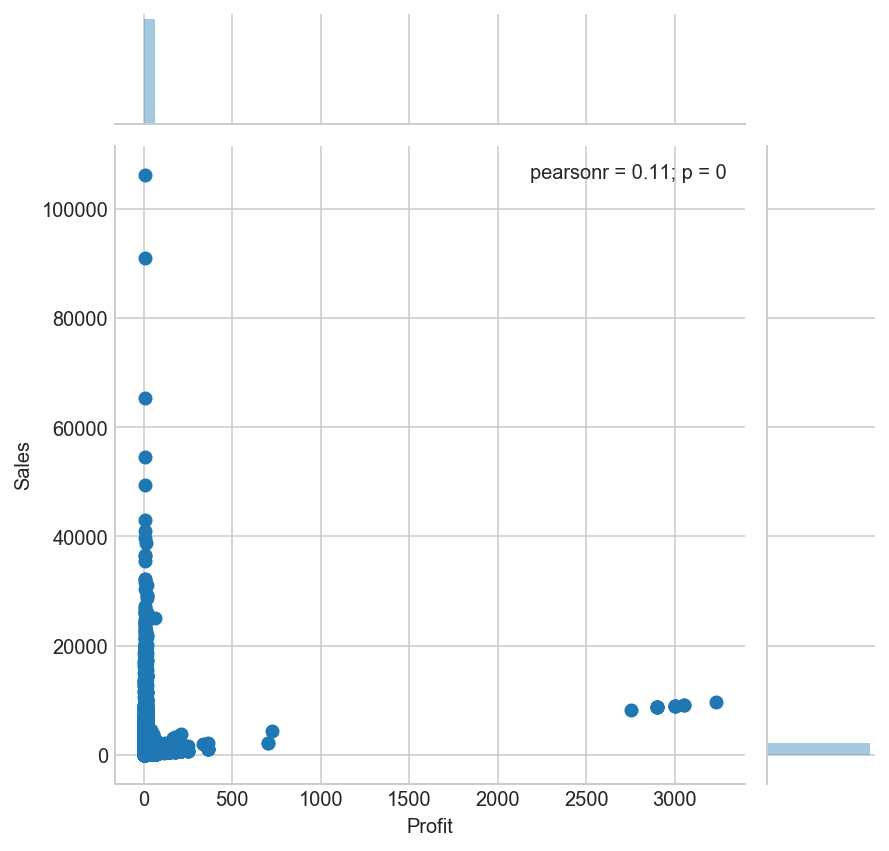

In [26]:
sns.jointplot(x=iowa['Profit'], y=iowa['Sales'], kind='scatter')
plt.show() #Plotting margin vs. sales, not much correlation between them. That will change once we create the new
#data frame that will include total sales from 2015, 2015 Q1 sales, etc. 

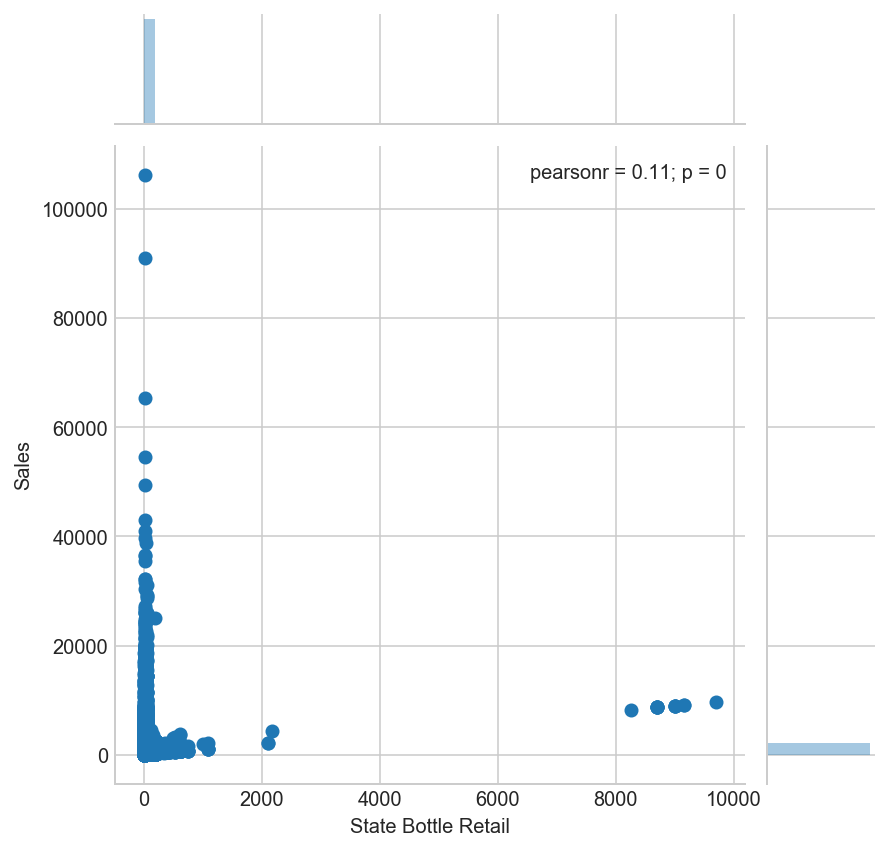

In [27]:
sns.jointplot(x=iowa['State Bottle Retail'], y=iowa['Sales'],kind='scatter')
plt.show() #plotting state bottle retail vs. sales

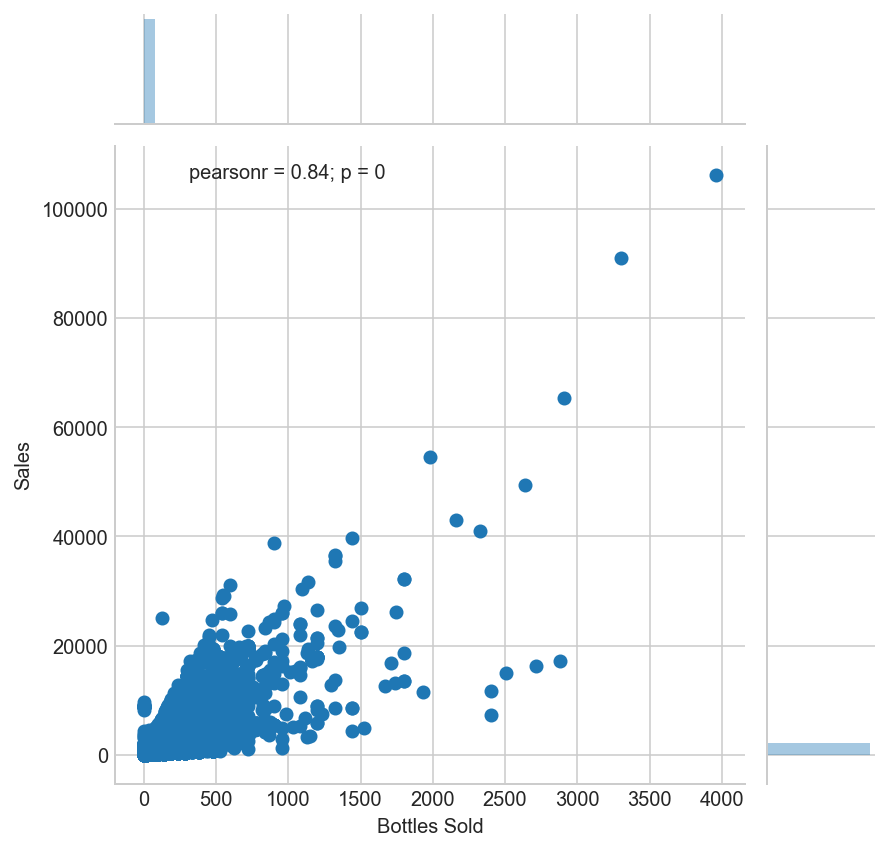

In [28]:
sns.jointplot(x=iowa['Bottles Sold'], y=iowa['Sales'],kind='scatter')
plt.show() #plotting bottles sold vs. sales. This is a pretty strong positive correlation

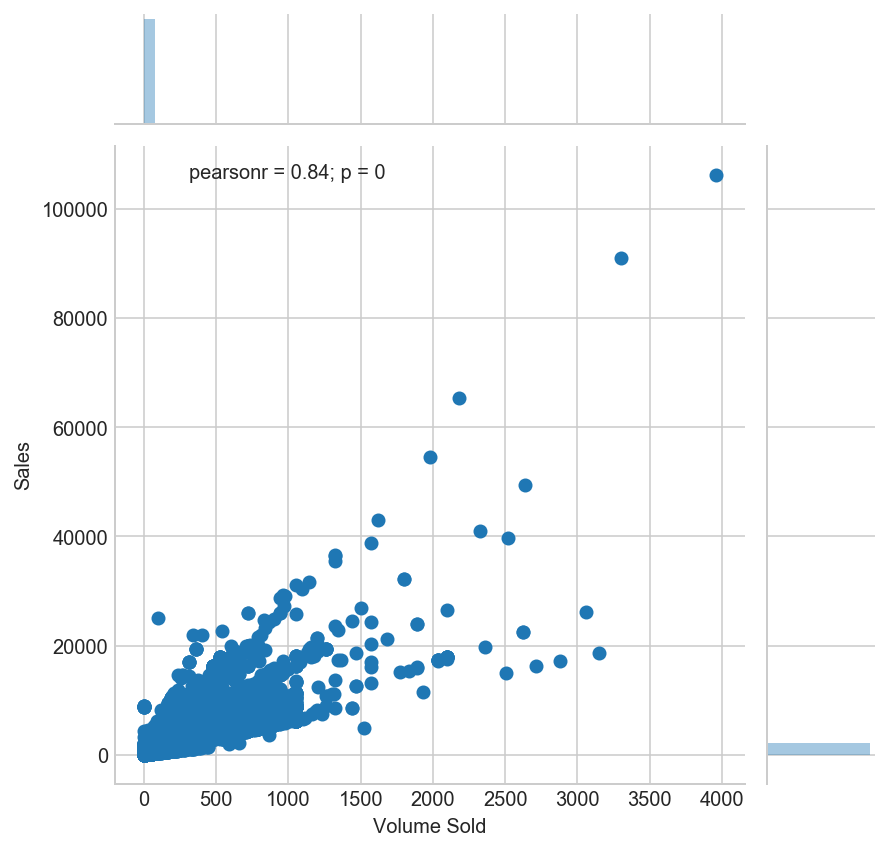

In [29]:
sns.jointplot(x=iowa['Volume Sold'], y=iowa['Sales'],kind='scatter')
plt.show() #along with bottles sold, this relationship shows a strong positive relationship. 

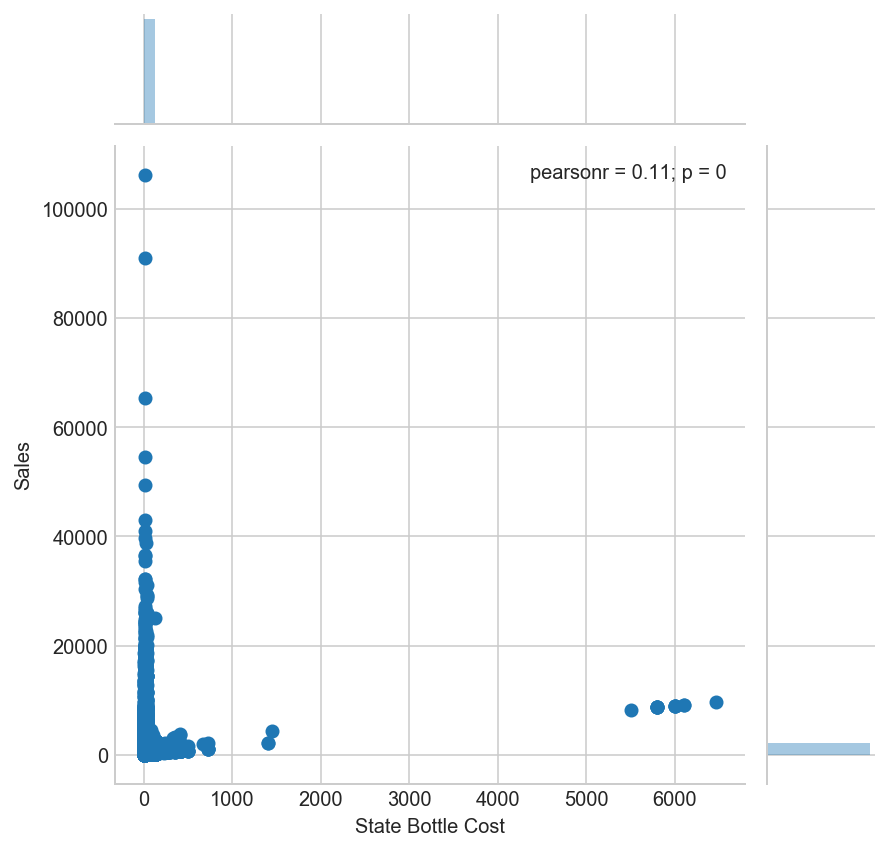

In [30]:
sns.jointplot(x=iowa['State Bottle Cost'], y=iowa['Sales'],kind='scatter')
plt.show() #simlilar to state bottle retail and state bottle cost, this scatter plot reveals a weak relationship
#this can change after creation of the new data frame. 

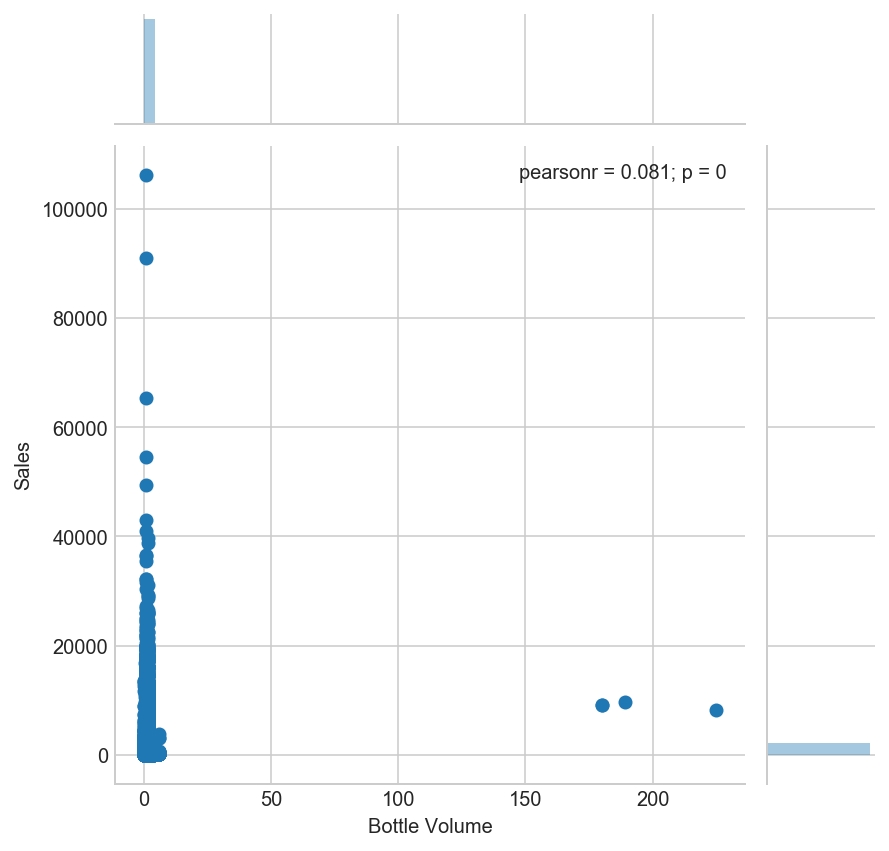

In [31]:
sns.jointplot(x=iowa['Bottle Volume'], y=iowa['Sales'],kind='scatter')
plt.show()  #a very weak, non-existent relationship between the variables. I just wanted to check to see if there was
#one. This is not surprising. 

# Mine the data

Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations here for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.
 


### I want to create a new data frame listing the 2015 total sales, 2015 Q1 sales, 2015 Q2-Q4 sales, 2015 Average price, 2015 total volume sold, 2015 total bottles sold. The same was done for 2016 except for Q2-Q4 sales. There is no column for 2016 total sales, since that is basically the 2016 Q1 sales column.

In [72]:
iowa2015 = iowa[iowa['Year'] == 2015] #creating a data frame for just 2015

In [73]:
sales2015 = iowa2015.groupby(['County'])['Sales'].sum()
#from the Iowa 2015 data frame, we want to aggregate the 2015 total sales
#by summing them and grouping them by county. Grouping them by counties rather than grouping them by store number
#is better as the stores could change and counties won't. 

In [74]:
q1_2015 = iowa[(iowa['Date'] >= '2015-01-01') & (iowa['Date'] <= '2015-03-31')] #similar process than above by 
#just pulling the first quarter of 2015. 

In [75]:
sales_q1_2015 = q1_2015.groupby(['County'])['Sales'].sum()
#from the 2015 Q1 data frame, I am pulling the total sales per county.

In [76]:
q2_q4_2015 = iowa[(iowa['Date'] >= '2015-04-01') & (iowa['Date'] <= '2015-12-31')] #again similar than the Q1 2015
#and Iowa 2015 data frame. 

In [77]:
q2_q4_2015_sales = q2_q4_2015.groupby(['County'])['Sales'].sum()

In [78]:
avg_2015_price = iowa2015.groupby(['County'])['Sales'].mean()
#want to calculate the average price so want to calculate the 
#average sales per county in 2015. 

In [79]:
q1_vol_2015 = q1_2015.groupby(['County'])['Volume Sold'].sum() #Grouping Q1 2015 volumes sold per county

In [80]:
q1_bot_2015 = q1_2015.groupby(['County'])['Bottles Sold'].sum() #Grouping Q1 2015 bottles sold per county

In [81]:
iowa2016 = iowa[iowa['Year'] == 2016] #Pulling a subset of observations in the year 2016

In [82]:
sales2016 = iowa2016.groupby(['County'])['Sales'].sum() #Grouping 

In [83]:
avg_2016_price = iowa2015.groupby(['County'])['Sales'].mean()

In [84]:
q1_vol_2016 = iowa2016.groupby(['County'])['Volume Sold'].sum()

In [85]:
q1_bot_2016 = iowa2016.groupby(['County'])['Bottles Sold'].sum()

In [86]:
combined = pd.concat([sales2015, sales_q1_2015, q2_q4_2015_sales, avg_2015_price, q1_vol_2015, q1_bot_2015,
                           sales2016, avg_2016_price, q1_vol_2016, q1_bot_2016], axis=1)
combined.head()

,Sales,Sales,Sales,Sales,Volume Sold,Bottles Sold,Sales,Sales,Volume Sold,Bottles Sold
County,,,,,,,,,,
Adair,424750.82,103556.31,321194.51,95.750861,8297.97,8861.0,105429.31,95.750861,8275.94,8454.0
Adams,100596.80,20335.03,80261.77,55.980412,1539.72,1804.0,21834.49,55.980412,1643.87,1727.0
Allamakee,823579.28,155988.96,667590.32,95.332710,12796.43,11789.0,180117.30,95.332710,14929.15,13687.0
Appanoose,835381.93,151755.48,683626.45,96.698915,12314.28,13073.0,176884.30,96.698915,13725.39,14585.0
Audubon,173849.23,39274.46,134574.77,84.392830,3298.56,3301.0,37113.57,84.392830,3426.62,3350.0


In [87]:
combined.columns = ['sales2015', 'sales_q1_2015', 'q2_q4_2015_sales', 'avg_2015_price', 'q1_vol_2015', 'q1_bot_2015',
                           'sales2016', 'avg_2016_price', 'q1_vol_2016', 'q1_bot_2016']

In [88]:
combined.head()

,sales2015,sales_q1_2015,q2_q4_2015_sales,avg_2015_price,q1_vol_2015,q1_bot_2015,sales2016,avg_2016_price,q1_vol_2016,q1_bot_2016
County,,,,,,,,,,
Adair,424750.82,103556.31,321194.51,95.750861,8297.97,8861.0,105429.31,95.750861,8275.94,8454.0
Adams,100596.80,20335.03,80261.77,55.980412,1539.72,1804.0,21834.49,55.980412,1643.87,1727.0
Allamakee,823579.28,155988.96,667590.32,95.332710,12796.43,11789.0,180117.30,95.332710,14929.15,13687.0
Appanoose,835381.93,151755.48,683626.45,96.698915,12314.28,13073.0,176884.30,96.698915,13725.39,14585.0
Audubon,173849.23,39274.46,134574.77,84.392830,3298.56,3301.0,37113.57,84.392830,3426.62,3350.0


# Refine the data

Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [89]:
combined.corr() #sum here is the 2015 total sales

,sales2015,sales_q1_2015,q2_q4_2015_sales,avg_2015_price,q1_vol_2015,q1_bot_2015,sales2016,avg_2016_price,q1_vol_2016,q1_bot_2016
sales2015,1.000000,0.999212,0.999938,0.405207,0.997353,0.996609,0.999558,0.405207,0.998592,0.998116
sales_q1_2015,0.999212,1.000000,0.998707,0.395356,0.999149,0.998515,0.999494,0.395356,0.999354,0.998874
q2_q4_2015_sales,0.999938,0.998707,1.000000,0.407863,0.996564,0.995790,0.999293,0.407863,0.998094,0.997619
avg_2015_price,0.405207,0.395356,0.407863,1.000000,0.396624,0.389661,0.394435,1.000000,0.397970,0.387260
q1_vol_2015,0.997353,0.999149,0.996564,0.396624,1.000000,0.998697,0.997925,0.396624,0.999309,0.997926
q1_bot_2015,0.996609,0.998515,0.995790,0.389661,0.998697,1.000000,0.997366,0.389661,0.998282,0.999016
sales2016,0.999558,0.999494,0.999293,0.394435,0.997925,0.997366,1.000000,0.394435,0.999278,0.999036
avg_2016_price,0.405207,0.395356,0.407863,1.000000,0.396624,0.389661,0.394435,1.000000,0.397970,0.387260
q1_vol_2016,0.998592,0.999354,0.998094,0.397970,0.999309,0.998282,0.999278,0.397970,1.000000,0.998949
q1_bot_2016,0.998116,0.998874,0.997619,0.387260,0.997926,0.999016,0.999036,0.387260,0.998949,1.000000


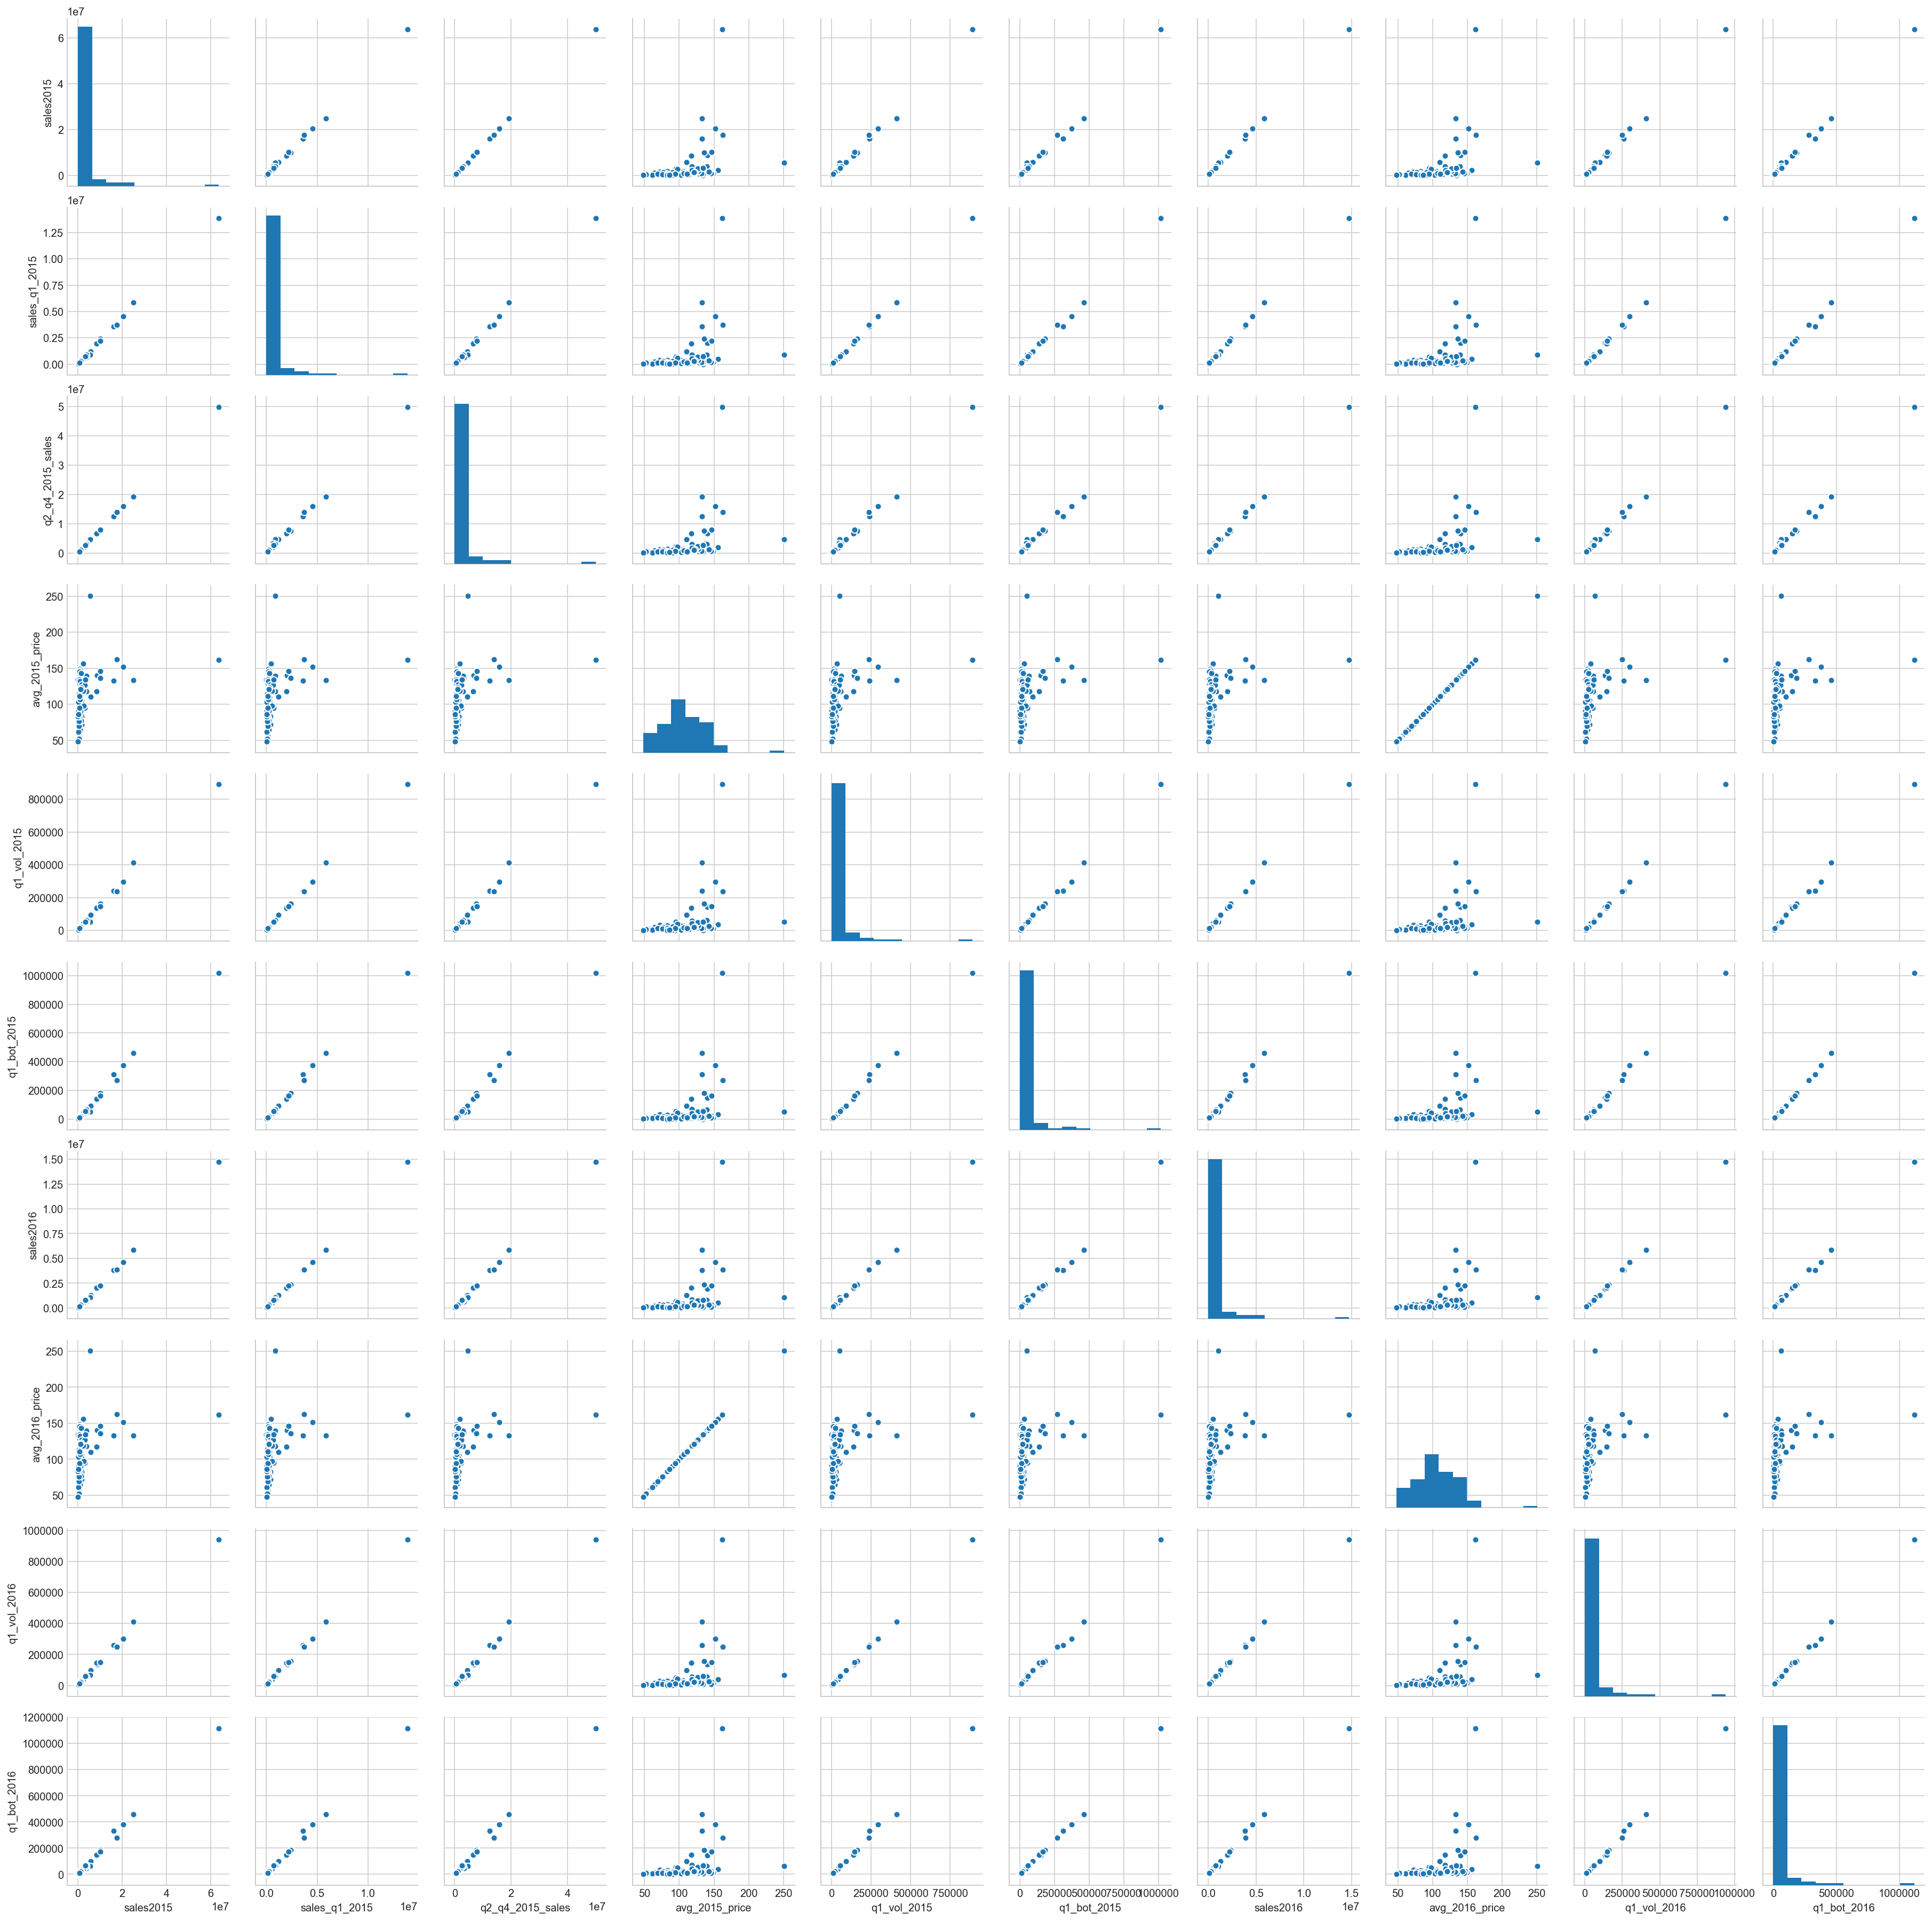

In [90]:
sns.pairplot(combined, kind="scatter")
plt.show()

The total volume sold, total bottles sold and Q1 sales have strong positive relationship with 2015 Total Sales. Thus, I will be using them in my model. Average price is not a great predictor, however.

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

## Model Number One - 2015 Total Sales vs. 2015 Q1 Sales

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [107]:
dep = combined['sales2015']
indep = combined['sales_q1_2015']
indep = sm.add_constant(indep)
model = sm.OLS(dep,indep)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              sales2015   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.151e+04
Date:                Thu, 08 Feb 2018   Prob (F-statistic):          9.34e-138
Time:                        13:04:16   Log-Likelihood:                -1387.1
No. Observations:                  99   AIC:                             2778.
Df Residuals:                      97   BIC:                             2783.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -2.25e+04   3.21e+04     -0.701

In [95]:
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size=0.3, random_state=1)

In [96]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(indep)
print(y_pred)

[  4.52886451e+05   7.32929810e+04   6.92045132e+05   6.72735151e+05
   1.59680549e+05   8.26226760e+05   1.63906264e+07   1.67571213e+06
   1.83876733e+06   1.32416071e+06   1.78396207e+06   2.96041453e+05
   2.97645464e+05   2.18177027e+06   1.15337629e+06   5.08624712e+05
   5.40122184e+06   7.33233355e+05   4.00503130e+05   6.07343633e+05
   1.68194874e+06   7.23483217e+05   3.31935185e+06   1.23152564e+06
   4.12340411e+06   7.78804632e+04   1.47548477e+05   8.31127190e+05
   4.02628213e+06   2.99303073e+06   9.23398717e+06   5.34936585e+05
   1.13900998e+06   1.27697252e+06   5.19856255e+05   4.77020672e+03
   6.25019544e+05   3.35349070e+05   2.52323376e+05   8.51905439e+05
   2.80900960e+05   1.85897095e+06   5.63412955e+05   1.13386402e+06
   7.48529432e+05   6.62904735e+05   4.35989602e+05   1.33196707e+06
   1.33067354e+06   1.79953009e+06   8.76299031e+05   1.70389548e+07
   1.09243925e+06   1.42951143e+05   1.83205836e+06   4.08246877e+06
   2.66054824e+07   2.50528339e+05

In [97]:
scores = cross_val_score(lm, X_test, y_test, cv=5)
print(scores) #not much variability between the R2 from cross validation. So this model does pretty well. 
print(np.mean(scores))

[ 0.98491462  0.99331391  0.98867012  0.99514098  0.9967742 ]
0.991762763827


### This model seems to be performing the best so far. I am going to try to build other models to see if there are other models worth using. By looking at the summary table calculated by statsmodels, I can see that for every unit increase in 2015 Q1 sales, there is a $4.55 increase in 2015 Total Sales. Assuming a significance level of 0.05 and a p-value of 0.000 that is shown in the table above, we can reject the null hypothesis (the beta coefficient is equal to zero) and can conclude that the alternative hypothesis is true (the beta coefficient is not zero) since the p-value is less than 0.05. This shows that 2015 Q1 sales impacts the 2015 total sales.

## Model Number 2 - Total Sales vs. Total 2015 Bottles Sold & Total 2015 Volumes Sold

In [108]:
dep1 = combined['sales2015']
indep1 = combined[['q1_vol_2015', 'q1_bot_2015']]
indep1 = sm.add_constant(indep1)
model = sm.OLS(dep1,indep1)
results = model.fit()
print(results.summary()) #giving this indep1, dep1 to indicate the differing model

                            OLS Regression Results                            
Dep. Variable:              sales2015   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     9239.
Date:                Thu, 08 Feb 2018   Prob (F-statistic):          1.74e-110
Time:                        13:04:32   Log-Likelihood:                -1446.0
No. Observations:                  99   AIC:                             2898.
Df Residuals:                      96   BIC:                             2906.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.858e+05   6.32e+04     -2.940      

In [99]:
X_train, X_test, y_train, y_test = train_test_split(indep1, dep1, test_size=0.3, random_state=2)

In [100]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred1 = lm.predict(indep1)
print(y_pred1)

[  4.02763186e+05  -4.53503432e+04   6.76316041e+05   6.69322818e+05
   6.65264623e+04   7.60194728e+05   1.66998269e+07   1.76808768e+06
   1.89946797e+06   1.33003832e+06   1.75478498e+06   2.65508267e+05
   2.56452870e+05   2.19224897e+06   1.09863617e+06   5.01565673e+05
   5.97711559e+06   6.99024930e+05   3.81587935e+05   4.91944596e+05
   1.81586944e+06   6.59974330e+05   3.58759368e+06   1.17498791e+06
   3.34790515e+06  -3.43719807e+04   2.81997811e+04   7.54574228e+05
   3.94461383e+06   3.10236262e+06   9.36644746e+06   4.85554489e+05
   1.20803494e+06   1.20837289e+06   4.74745828e+05  -1.23487232e+05
   5.50743174e+05   2.82250128e+05   1.76542306e+05   8.65558992e+05
   2.48847070e+05   1.99773500e+06   4.86812665e+05   1.09943762e+06
   7.36165499e+05   6.40758065e+05   3.48758437e+05   1.36971843e+06
   1.39812546e+06   1.95739047e+06   7.99451686e+05   1.59287451e+07
   1.15170257e+06   5.69045097e+04   1.86330884e+06   4.03371118e+06
   2.76187777e+07   1.72043961e+05

In [101]:
scores = cross_val_score(lm, indep1, dep1, cv=5)
print(scores) 
print(np.mean(scores))

[ 0.98921296  0.93088689  0.97709545  0.99061206  0.99773412]
0.977108294937


### This is the best model I have as I wanted to see if total volumes sold and total bottles sold would be a good predictor of total sales. They both had a high correlation with total sales so I wanted to examine their relationship together with total sales. But, introducing volume and bottles sold into a model together brings up the issue of multicollinearity. As the number of bottles go up, the volume would also probably go up. Thus, I will ignore this model and choose another model by separating these variables and just include one variable.

### By looking at the results.summary table, I can see that for every unit increase in Q1 Volumes sold, 2015 Total Sales increases by 54.75 dollars and for every unit increase in Q1 Bottles sold, 2015 Total Sales increases by 12.94 dollars. 

### Also by looking at the p-values for both input variables, we can reject the null hypothesis that the beta coefficient for Q1 2015 Volumes sold equals 0 as the p-value is less than a signficance level of 0.05. Thus, we can conclude that the alternative hypothesis that the beta coeffiicent does not equal zero is true. But for Q1 Bottles sold, we fail to reject the null hypothesis that the beta coefficient equals 0.  Q1 2015 Volumes Sold does impact 2015 Total Sales, while Q1 2015 Bottles sold does not since we cannot reject the null hypothesis that the beta coefficient for Q1 2015 Bottles sold equals to zero.

## Model Number 3 - 2015 Total Sales vs. Total 2015 Volumes Sold and 2015 Q1 Sales

In [143]:
dep2 = combined['sales2015']
indep2 = combined[['q1_vol_2015', 'sales_q1_2015']]
indep2 = sm.add_constant(indep2)
model = sm.OLS(dep2,indep2)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              sales2015   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.919e+04
Date:                Thu, 08 Feb 2018   Prob (F-statistic):          2.94e-145
Time:                        13:59:29   Log-Likelihood:                -1363.4
No. Observations:                  99   AIC:                             2733.
Df Residuals:                      96   BIC:                             2741.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9.945e+04   2.99e+04      3.323

In [104]:
X_train, X_test, y_train, y_test = train_test_split(indep2, dep2, test_size=0.3, random_state=3)

In [105]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred2 = lm.predict(indep2)
print(y_pred2)

[   530768.38633989    205656.37172289    726143.58286701    715046.2003577
    270961.63137375    888360.16545024  16157222.01059235
   1608001.89807964   1775078.60232248   1333190.34164615
   1789482.80153272    364161.40041069    370176.05089913
   2121751.95492475   1194408.79313395    557041.4221691    4876873.8943569
    792063.29608279    445437.46263062    709739.8797211    1577815.06397759
    789017.31218372   3122485.49233629   1263130.44614793
   4471819.09607901    203003.91167044    279149.62546716
    898519.85234653   4067356.80530809   2838544.41259955
   8880688.96401999    601727.81677812   1092689.71500143
   1330854.77524074    588555.14261645    144999.93575837    707237.2792456
    414870.76124356    351616.42170637    874125.15046072
    348768.28411411   1733980.06339802    655618.07860112   1167176.5488031
    769906.78931315    704485.7585319     527289.27665943   1309482.7682534
   1292263.9194088    1703573.09925366    953474.52034223
  17324438.40738882  

In [106]:
scores = cross_val_score(lm, indep2, dep2, cv=5) 
print(scores)
print(np.mean(scores))

[ 0.99460904  0.97023955  0.99871678  0.9997505   0.99923281]
0.992509736106


### Intepretation of the coefficients: For every unit increase in Q1 Volumes Sold, there is -41.47 dollar decrease in 2015 Total Sales and for every unit increase in 2015 Q1 Sales, there is a 7.25 dollar increase in 2015 Total Sales. 

### This model doesn't perform as well as the previous two models. Although the p-values reveal that the Q1 2015 Sales and 2015 Q1 Volumes sold reveal that the alternative hypotheses for the both of them are true. This means we can conclude that the beta coefficients for both input variables are not equal to zero, thus they do have an impact on 2015 Total Sales. 


### Let's see if I can remove 2015 Q1 sales and just allow Q1 Volumes sold to predict the 2015 Total Sales

## Model 4: 2015 Q1 Sales vs. 2015 Q1 Volumes Sold

In [114]:
dep = combined['sales2015']
indep = combined[['q1_vol_2015',]]
indep = sm.add_constant(indep3)
model = sm.OLS(dep3,indep3)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              sales2015   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.825e+04
Date:                Thu, 08 Feb 2018   Prob (F-statistic):          3.06e-112
Time:                        13:05:49   Log-Likelihood:                -1447.1
No. Observations:                  99   AIC:                             2898.
Df Residuals:                      97   BIC:                             2903.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.195e+05   5.94e+04     -3.697      

In [115]:
X_train, X_test, y_train, y_test = train_test_split(indep3, dep3, test_size=0.3, random_state=3)

In [116]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred3 = lm.predict(indep3)
print(y_pred3)

[  4.57442669e+05   1.62387669e+04   7.51119006e+05   7.19642446e+05
   1.31062437e+05   8.28570341e+05   1.57014339e+07   1.82908102e+06
   1.97307608e+06   1.37683959e+06   1.80754326e+06   3.28715518e+05
   3.22875887e+05   2.28393445e+06   1.16590062e+06   5.57860827e+05
   6.02966728e+06   7.48123788e+05   4.63732105e+05   5.59473989e+05
   1.89530812e+06   7.27985057e+05   3.56228754e+06   1.25376471e+06
   3.40008484e+06   3.24963791e+04   8.61197983e+04   8.24368026e+05
   3.82053504e+06   3.19039866e+06   9.28737993e+06   5.51671928e+05
   1.29763408e+06   1.25877850e+06   5.34570197e+05  -6.01379977e+04
   6.09304422e+05   3.46110373e+05   2.36569464e+05   9.18556809e+05
   3.15144332e+05   2.09350893e+06   5.35797531e+05   1.16068575e+06
   8.24430699e+05   7.11770532e+05   4.19555245e+05   1.43636727e+06
   1.46160858e+06   1.99038541e+06   8.49869165e+05   1.54391486e+07
   1.22705125e+06   1.19445194e+05   1.96295514e+06   4.00802736e+06
   2.68442308e+07   1.92296636e+05

In [117]:
scores = cross_val_score(lm, indep3, dep3, cv=5) 
print(scores)
print(np.mean(scores))

[ 0.99616844  0.93209148  0.97725309  0.9920717   0.99747187]
0.979011316092


### This model doesn't seem to be the best performing out the four I created. I will extrapolate the regression of Model One.

### The coefficient interpretation: For every unit increase in Q1 2015 Volumes sold, there is a 69.65 dollar increase in 2015 Total sales.  The p-value of 0.000 is less than the significance level of 0.05, which reveals that Q1 Volumes sold alone (not paired with Q1 2015 Bottles sold) has an impact on 2015 Total Sales.

# Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

In [ ]:
from sklearn import linear_model

### Model I pick to predict 2016 Sales --> Model One: 2015 Total Volumes Sold to predict 2015 Total Sales

Text(0,0.5,'2015 Total Sales')

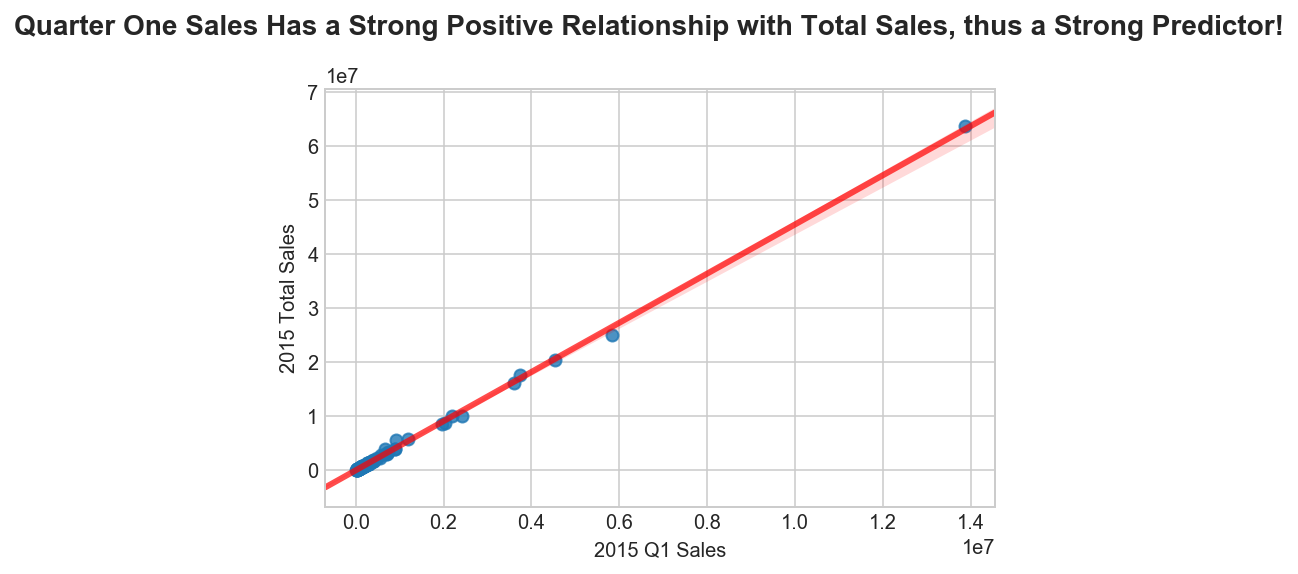

In [162]:
fig = plt.figure()
fig.suptitle('Quarter One Sales Has a Strong Positive Relationship with Total Sales, thus a Strong Predictor!', fontsize=14, fontweight='bold')

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

sns.regplot(x=combined['sales_q1_2015'], y=combined['sales2015'], line_kws={"color":"r","alpha":0.7,"lw":3})

ax.set_xlabel('2015 Q1 Sales')
ax.set_ylabel('2015 Total Sales')


In [139]:
dep = combined['sales2015']
indep = combined['sales_q1_2015']
indep = sm.add_constant(indep)
model = sm.OLS(dep,indep)
results = model.fit()
print(results.summary()) #just for reference

                            OLS Regression Results                            
Dep. Variable:              sales2015   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 6.151e+04
Date:                Thu, 08 Feb 2018   Prob (F-statistic):          9.34e-138
Time:                        13:28:37   Log-Likelihood:                -1387.1
No. Observations:                  99   AIC:                             2778.
Df Residuals:                      97   BIC:                             2783.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -2.25e+04   3.21e+04     -0.701

#### Let's predict 2015 Total Sales from our model

In [129]:
sum(lm.predict(indep)) 

284236031.26003659

#### Now, let's calculate the 2015 Total Sales from a simple df.sum() function in Pandas.

In [130]:
combined['sales2015'].sum() #to see what the actual 2015 total sales was 

284236031.2600367

# Predicted 2015 Total Sales: $284,236,031.26

# Actual 2015 Total Sales: $284,236,031.26

#### These values are virtually identical, which is a bit surprising that the model predicted the 2015 Total Sales that well. But also it is not surprising as well because it's R^2 value of 0.998 reveals that 99.8% of the change in total sales can be explained by the model when compared to a model with no predictors (i.e. a baseline). 

### Now let's extrapolate from this model to predict 2016 total sales

In [142]:
B_1 = 4.5500 #took from the results summary table
B_0 = -22500 #took from the results summary table
sales2016 = combined['sales2016'].values #Q1 2016 Sales

y_pred_2016 = B_1*sales2016 - B_0 #calculating y_pred for 2016
sum(y_pred_2016) #summing it to get the calculated 2016 Total Sales

295191477.53350788

## Predicted 2016 Sales using the model --> $295,191,477.53

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

All of the models that I have created good performing models and could have selected any of them to be the model. They all had R^2 values above .99 of all these models reveal that above 99% of the change in the total sales can be explained by the input variables compared to a baseline of the sample mean. I use to predict 2016 Total Sales. From my analysis, I found that 2015 Q1 Sales is a strong predictor for 2015 Total Sales, thus 2016 Total Sales was the one at the top in terms of performanced based . With other models, I found possible issues of multicollinearity as the volume sold and bottles sold are highly correlated with a Pearson cofficient of 0.99. I still wanted to see their relationship with 2015 Total Sales. I segregated the Q1 total volumes sold variable into its own model with total sales and it come to be a good model as well. With regards to the bias/variance trade-off, on average the predictions are correct for the model, thus a low bias and almost al of the the predictions are very to close to one another, showing low variance. This is exluding the one outlier of Polk County, which had higher sales than any other county, granted that Polk County also is home to Des Moines.

The limitations with my models is that they do not consider other variables such as demographics, consumer preference, stores with more sales (such as Polk County where Des Moines is located), and economic data.

#### The risks and assumptions associated with my data

The risks and assumptions associated with my data is that it assumes a static economy, steady prices, and static population growth. The data is also assumed to be correct and also assumptions of no data entry error or other data problems that could affect the predictive model. 